
# Predict Income using US Census Data

**Data Set Information**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over $50K a year.

**Relevant papers**

Ron Kohavi, ["Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"][1], *Proceedings of the Second International Conference on Knowledge Discovery and Data Mining*, 1996. (PDF)

  [1]: http://robotics.stanford.edu/~ronnyk/nbtree.pdf

**Attribute Information**


>50K, <=50K. 

1. age: continuous. 

1. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

1. fnlwgt: continuous. 

1. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 
12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

1. education-num: continuous. 

1. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

1. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

1. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

1. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

1. sex: Female, Male. 

1. capital-gain: income from investment sources, apart from wages/salary.. 

1. capital-loss: losses from investment sources, apart from wages/salary. 

1. hours-per-week: continuous. 

1. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



###### Load Libraries

In [13]:
library(tidyverse)
library(plotly)
library(DataExplorer)
library(caret)
library(rpart)
library(rpart.plot)
library(randomForest)
library(xgboost)
library(e1071)
library(parallelSVM)
library(Metrics)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 2.2.1     v purrr   0.2.4
v tibble  1.4.2     v dplyr   0.7.4
v tidyr   0.8.0     v stringr 1.3.0
v readr   1.1.1     v forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'tidyr' was built under R version 3.4.3"Warning message:
"package 'readr' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"Warning message:
"package 'dplyr' was built under R version 3.4.3"Warning message:
"package 'stringr' was built under R version 3.4.3"Warning message:
"package 'forcats' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

##### **Load & explore the features of the dataset**

In [1]:
setcol <- c("age","workclass","fnlwgt","education","education-num","marital-status",
            "occupation","relationship","race","sex","capital-gain","capital-loss",
            "hours-per-week","native-country","target")
#load data
adult <- read.table("~/Desktop/Predict-Income-using-US-Census-Data/adult.data.txt",header = F,
                    sep = ",",col.names = setcol,na.strings = c(" ?"),stringsAsFactors = T)
head(adult)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [2]:
str(adult)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 8 levels " Federal-gov",..: 7 6 4 4 4 4 4 6 4 4 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  4

Remove meaningless features

In [3]:
adult <- dplyr::select(adult, -fnlwgt, -education.num,
                         -capital.gain, -capital.loss)

In [4]:
dim(adult)

[1] 32561    11

In [5]:
head(adult)

age,workclass,education,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,target
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [6]:
summary(adult)


      age                    workclass             education    
 Min.   :17.00    Private         :22696    HS-grad     :10501  
 1st Qu.:28.00    Self-emp-not-inc: 2541    Some-college: 7291  
 Median :37.00    Local-gov       : 2093    Bachelors   : 5355  
 Mean   :38.58    State-gov       : 1298    Masters     : 1723  
 3rd Qu.:48.00    Self-emp-inc    : 1116    Assoc-voc   : 1382  
 Max.   :90.00   (Other)          :  981    11th        : 1175  
                 NA's             : 1836   (Other)      : 5134  
                marital.status             occupation   
  Divorced             : 4443    Prof-specialty : 4140  
  Married-AF-spouse    :   23    Craft-repair   : 4099  
  Married-civ-spouse   :14976    Exec-managerial: 4066  
  Married-spouse-absent:  418    Adm-clerical   : 3770  
  Never-married        :10683    Sales          : 3650  
  Separated            : 1025   (Other)         :10993  
  Widowed              :  993   NA's            : 1843  
          relationship  

**Check the number of missing values and remove it**

*We save the omitted data in a new dataframe*

In [7]:
colSums(sapply(adult,is.na))

age      workclass      education marital.status     occupation 
             0           1836              0              0           1843 
  relationship           race            sex hours.per.week native.country 
             0              0              0              0            583 
        target 
             0

In [8]:
sum(!complete.cases(adult))

[1] 2399

In [9]:
# % of Missing Values
sum(is.na(adult)) / (nrow(adult) *ncol(adult))


[1] 0.01189934

In [15]:
adult_omitted =  adult %>% na.omit()
colSums(sapply(adult_omitted,is.na))


age      workclass      education marital.status     occupation 
             0              0              0              0              0 
  relationship           race            sex hours.per.week native.country 
             0              0              0              0              0 
        target 
             0

In [16]:
tmp_df <- adult[!duplicated(adult), ]
dim(tmp_df)

[1] 28318    11

## EDA & Visualization

In [16]:
plot_str(adult)

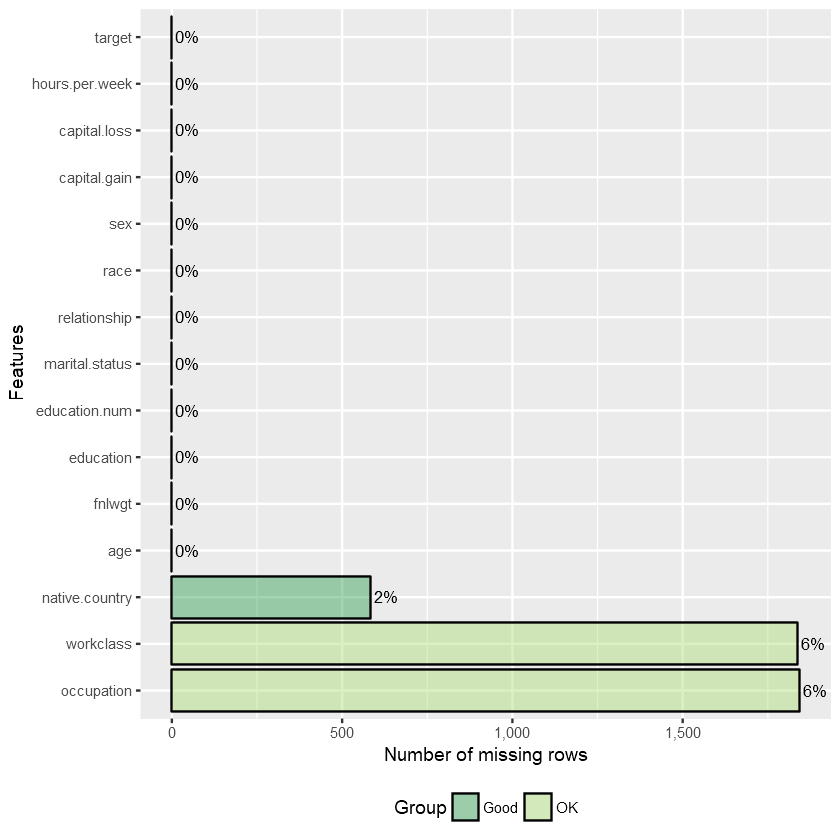

In [12]:
plot_missing(adult)

**Correlation Map between attributes**

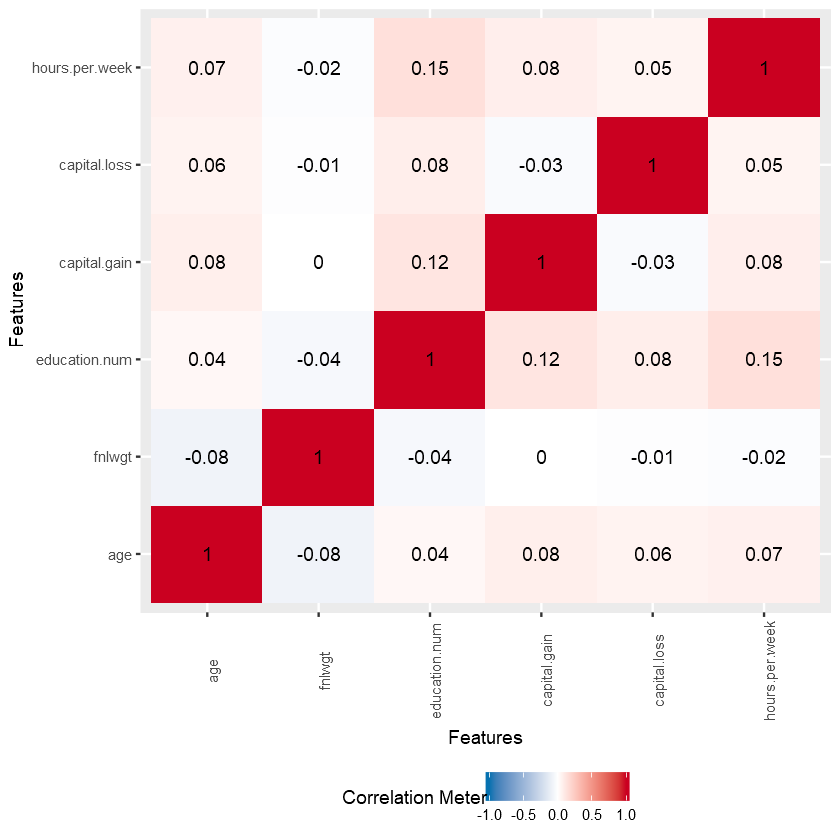

In [13]:
plot_correlation(adult, type = 'continuous','Review.Date')

In [62]:
#plot_bar(adult)

In [63]:
#plot_density(adult)

### *Continuous (Numeric) Features*

#### **Age** 

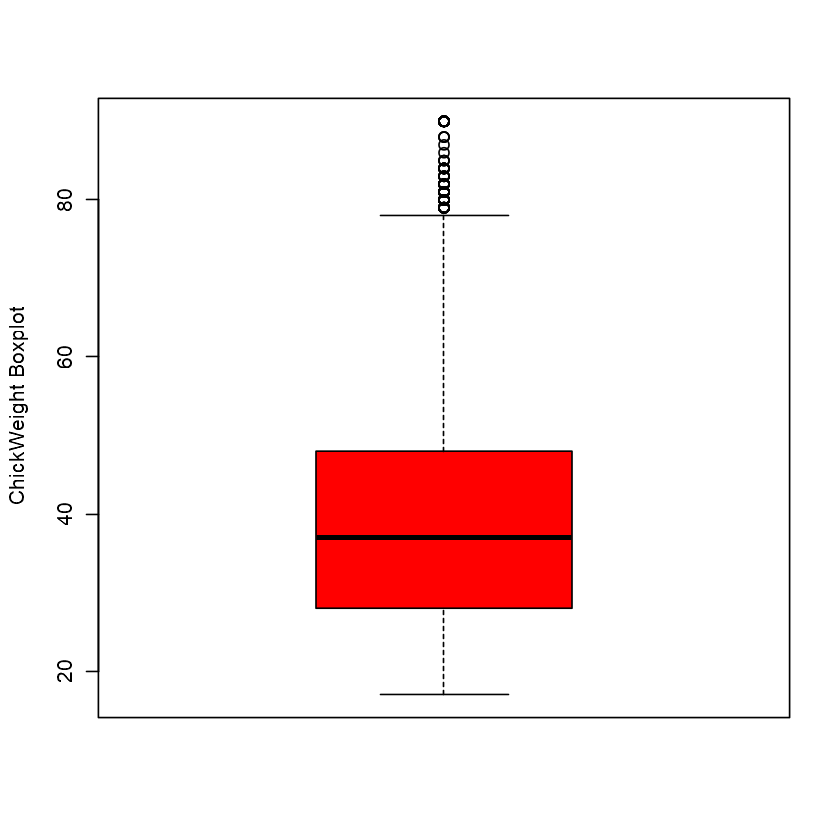

In [7]:
boxplot(adult$age, col = rainbow(6), ylab = "ChickWeight Boxplot")

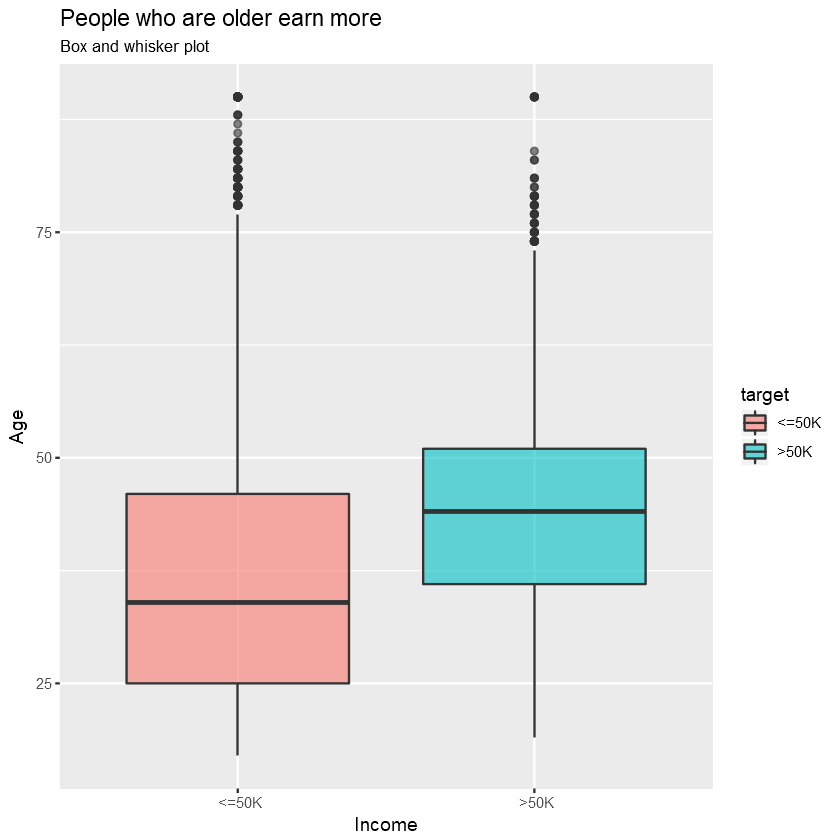

In [9]:
age_box <- ggplot(adult, aes(x = target, y = age, fill = target)) +
   geom_boxplot(alpha = 0.6) +
   labs(x = "Income", y = "Age", title = "People who are older earn more",
        subtitle = "Box and whisker plot")

age_box

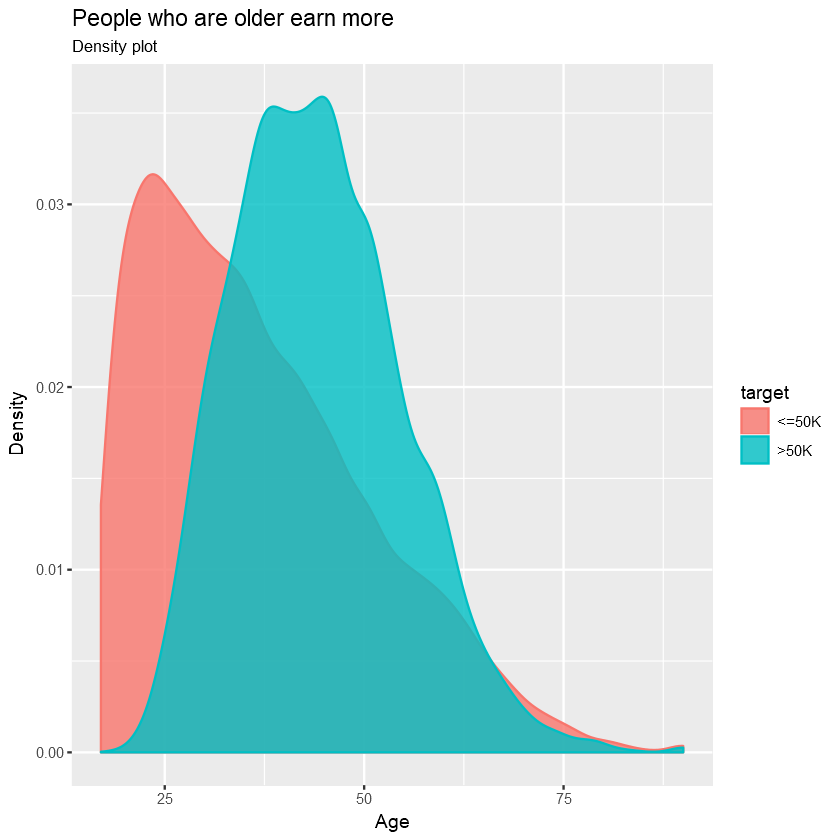

In [53]:
age_density <- ggplot(adult, aes(x = age, color = target, fill = target)) + geom_density(alpha = 0.8) +
   labs(x = "Age", y = "Density", title = "People who are older earn more",
        subtitle = "Density plot")
age_density

**The age in dataset has a high Distribtuoin betweeen 20 and 40** 

Warning message:
"Removed 1657 rows containing non-finite values (stat_bin)."

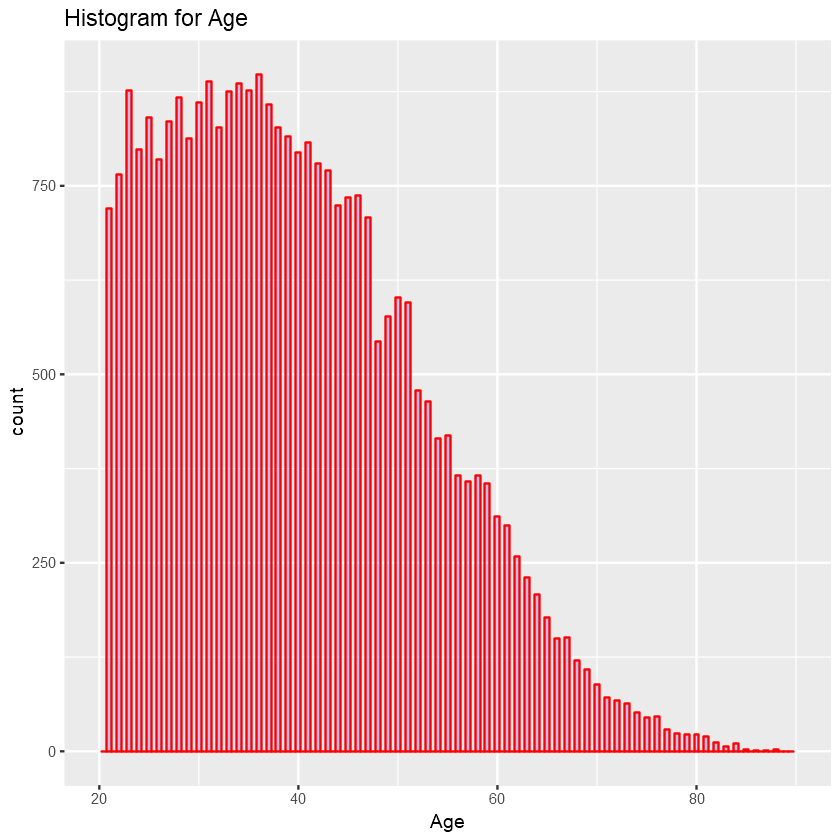

In [22]:
qplot(adult$age,
      geom="histogram",
      binwidth = 0.5,  
      main = "Histogram for Age", 
      xlab = "Age",  
      fill=I("blue"), 
      col=I("red"), 
      alpha=I(.2),
     xlim = c(20,90))


#### **Hours per.Week**

**The no of  hours per weak is distributed between 35 and 50 hours..little people who work more than 50 hours**


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


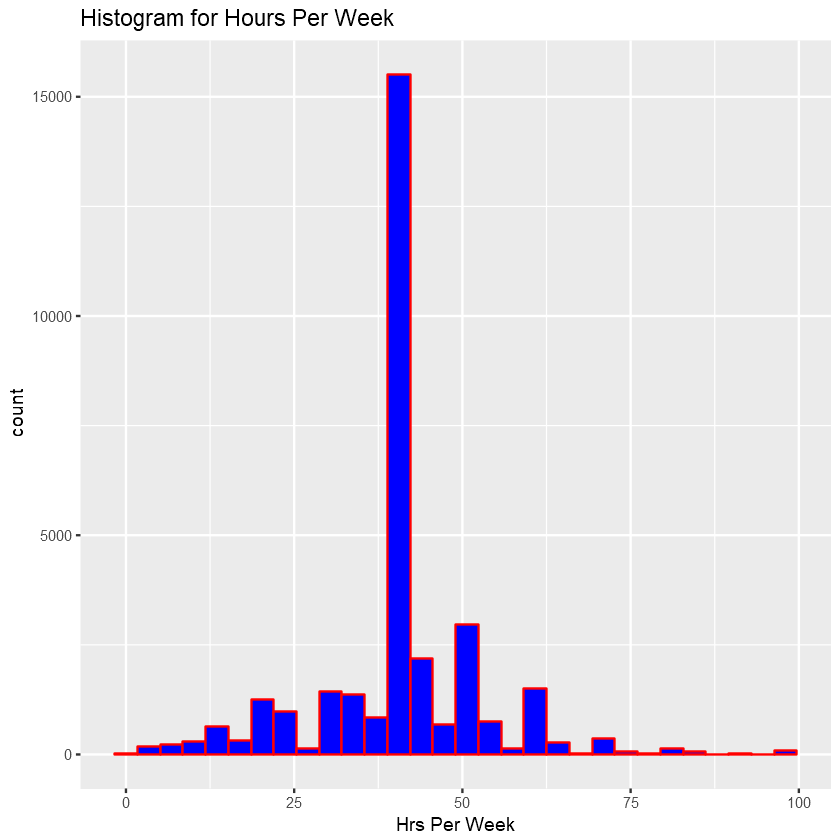

In [48]:
qplot(adult$hours.per.week,
      geom="histogram",  
      main = "Histogram for Hours Per Week", 
      xlab = "Hrs Per Week",  
      fill=I("blue"), 
      col=I("red"))

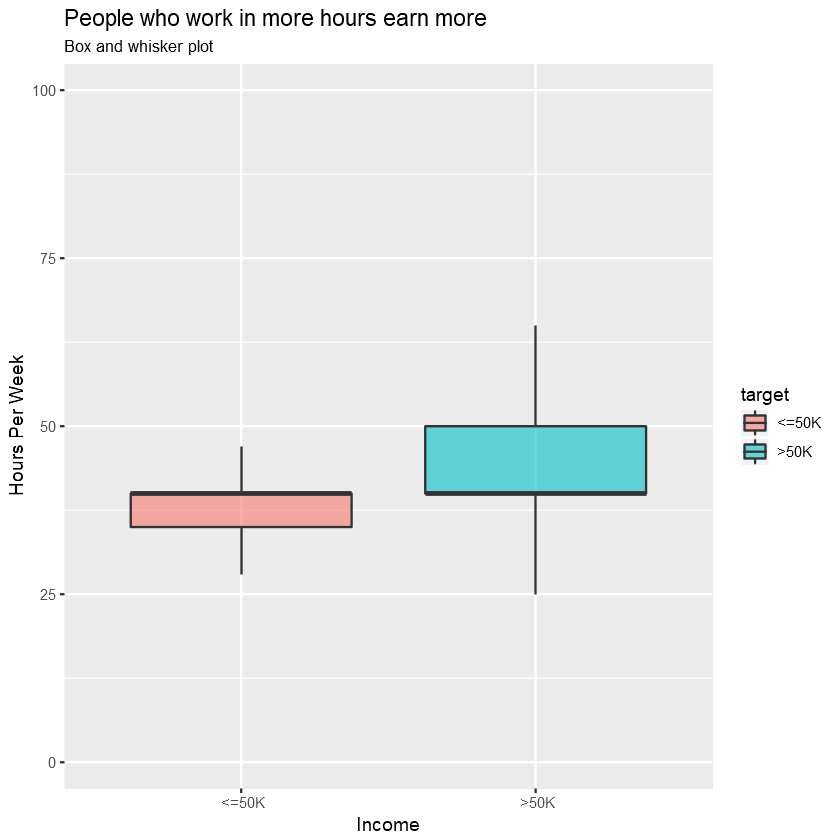

In [47]:
hours.per.week_box <- ggplot(adult, aes(x = target, y = hours.per.week, fill = target)) +
   geom_boxplot(alpha = 0.6,outlier.shape = NA) +
   labs(x = "Income", y = "Hours Per Week", title = "People who work in more hours earn more",
        subtitle = "Box and whisker plot")
hours.per.week_box
#outlier.shape = NA

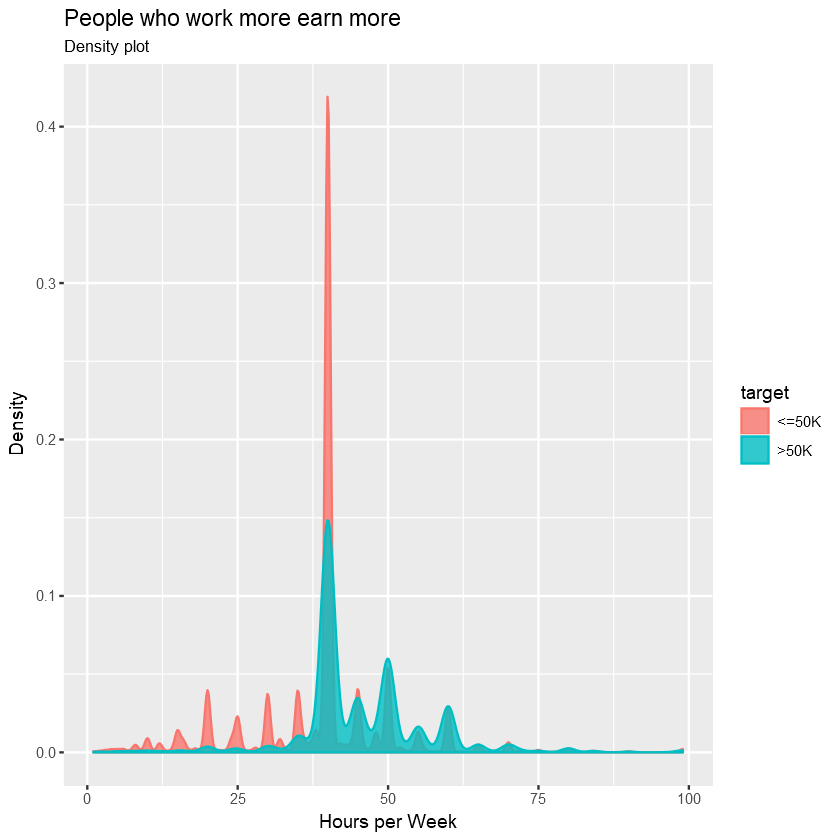

In [23]:
hours_per_week_density <- ggplot(adult, aes(x = hours.per.week, color = target, fill = target)) + 
geom_density(alpha = 0.8) +
   labs(x = "Hours per Week", y = "Density", title = "People who work more earn more",
        subtitle = "Density plot")
hours_per_week_density

#### **Education Num**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


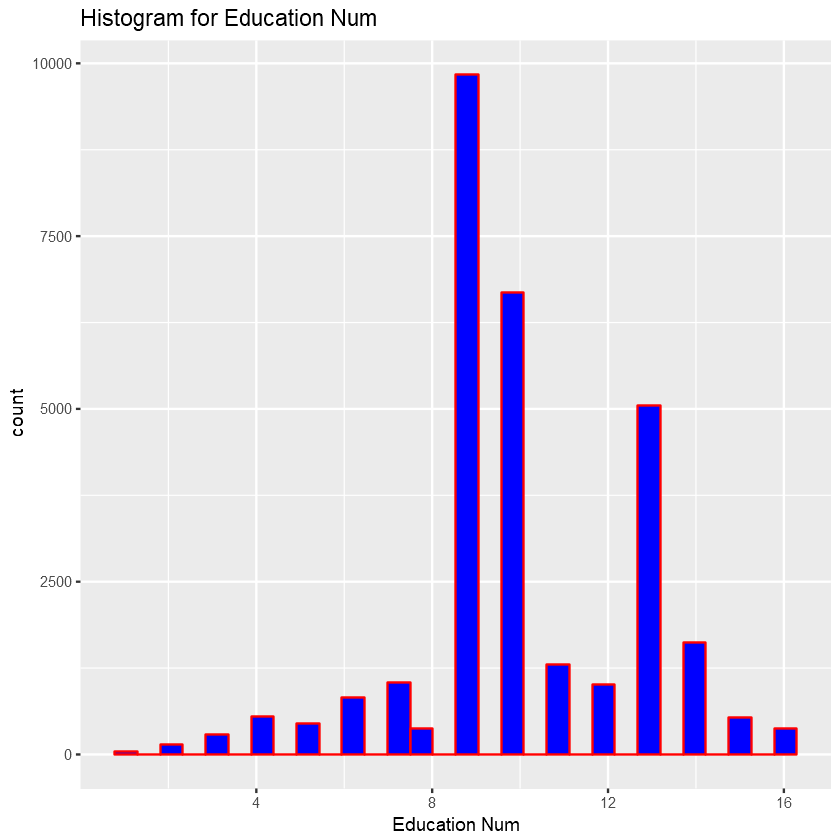

In [26]:
qplot(adult$education.num,
      geom="histogram",  
      main = "Histogram for Education Num", 
      xlab = "Education Num",  
      fill=I("blue"), 
      col=I("red"))

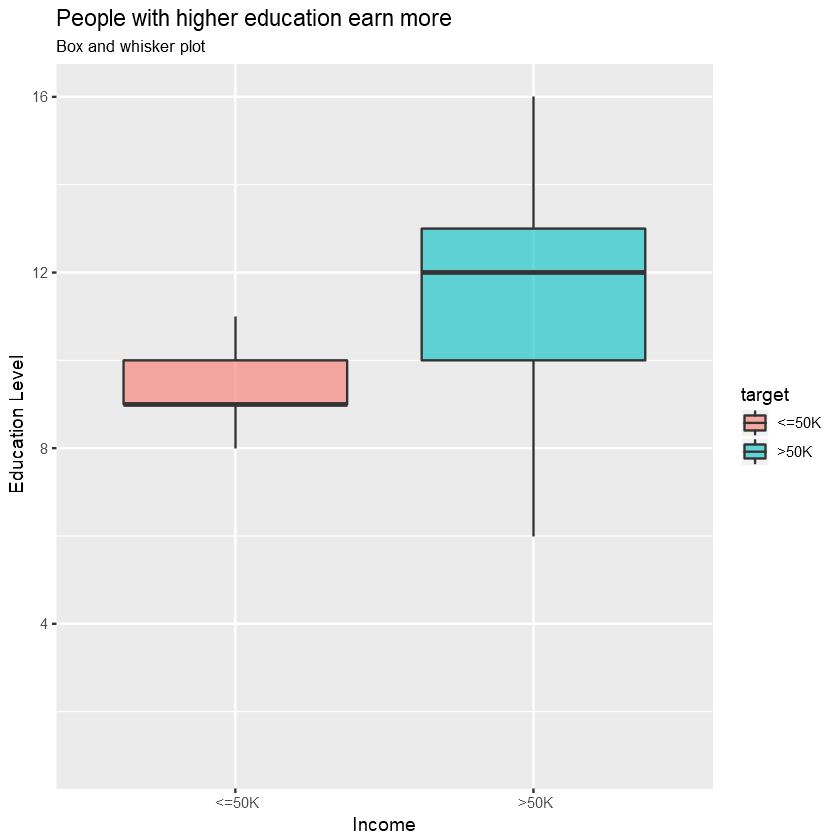

In [66]:
education_num_box <- ggplot(adult, aes(x = target, y = education.num, fill = target)) +
   geom_boxplot(alpha = 0.6,outlier.shape = NA) +
   labs(x = "Income", y = "Education Level", title = "People with higher education earn more",
        subtitle = "Box and whisker plot")
education_num_box

In [27]:
#education_num_density <- ggplot(adult, aes(x = education.num, color = target, fill = target)) + 
#geom_density(alpha = 0.8) +
 #  labs(x = "Education", y = "Density", title = "People with higher education earn more",
  #      subtitle = "Density plot")
#education_num_density

### *Categorical Features*

**We see that people who are self-employed and have a company are more likely to earn above 50K** 

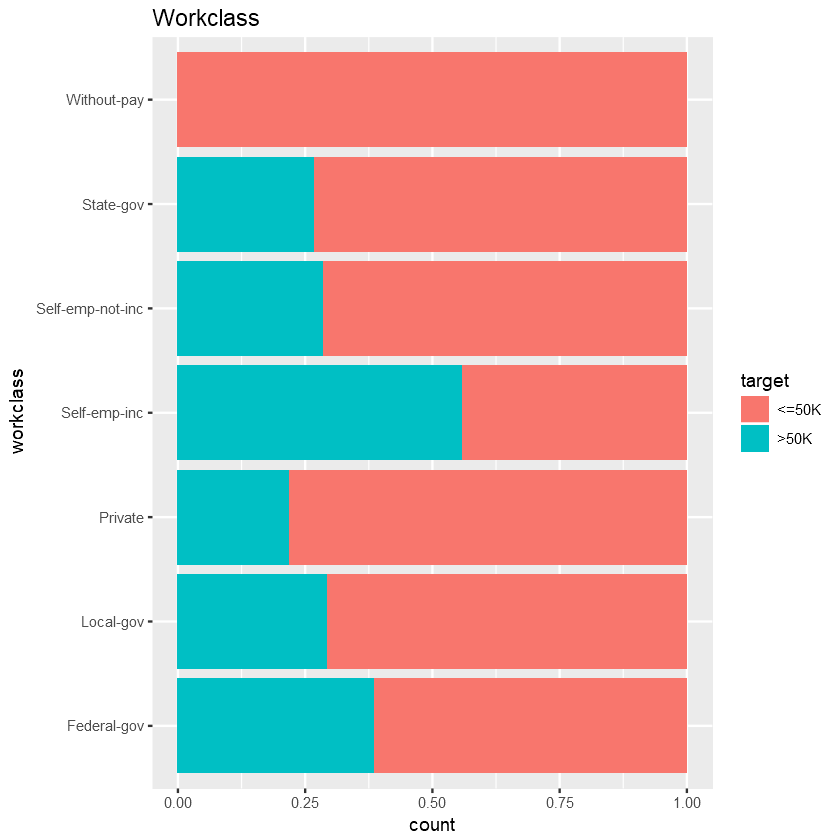

In [22]:
#workclass
workclass_bar <- ggplot(adult_omitted, aes(x = workclass, fill = target)) + geom_bar(position="fill") + 
coord_flip() +  ggtitle("Workclass")

workclass_bar

**Married people tend to earn more**

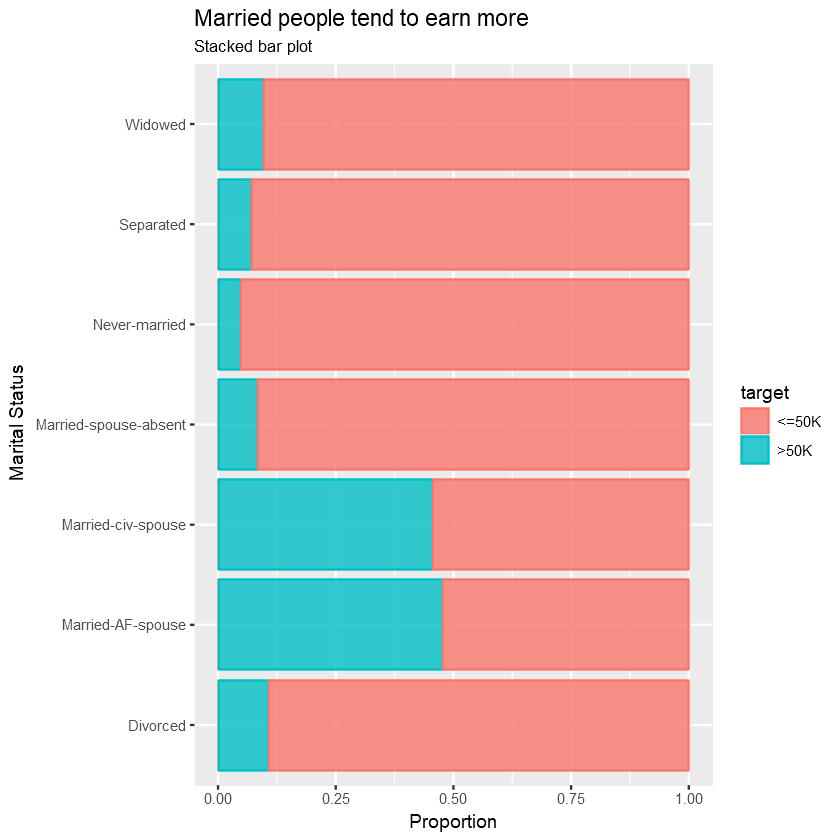

In [36]:
ggplot(adult_omitted, aes(x = marital.status, fill = target, color = target)) +
   geom_bar(alpha = 0.8, position = "fill") +
   coord_flip() +
   labs(x = "Marital Status", y = "Proportion", title = "Married people tend to earn more",
        subtitle = "Stacked bar plot")



**People with more education earn more**

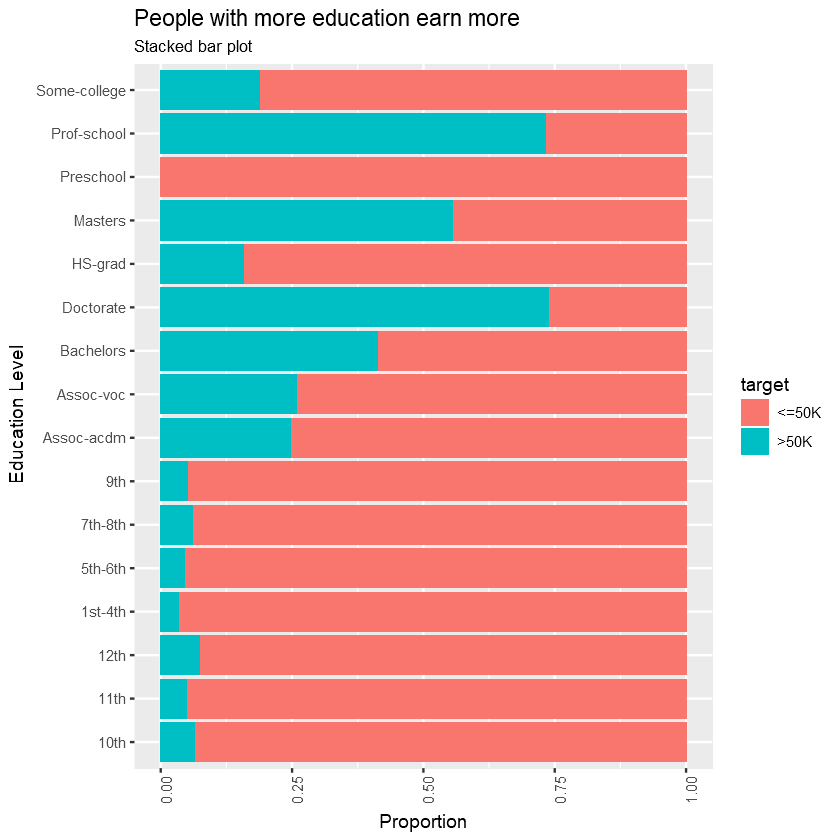

In [11]:
#Education
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") +
 coord_flip() + theme(axis.text.x = element_text(angle = 90)) + 
labs(x = "Education Level", y = "Proportion", title = "People with more education earn more",
        subtitle = "Stacked bar plot")

**The most occupation is Exec-Mangerial(Executive Manager) and Prof-Specilty and the least is Handler-Clearners**

and from this plot we note that:

1.  The count of Executive Manager is relatively equal in income
1. The Armed Force has low levels in income (Unlike our Egyptian Armed force who stole Wealth of Egypt),Also the private house services has low levels 


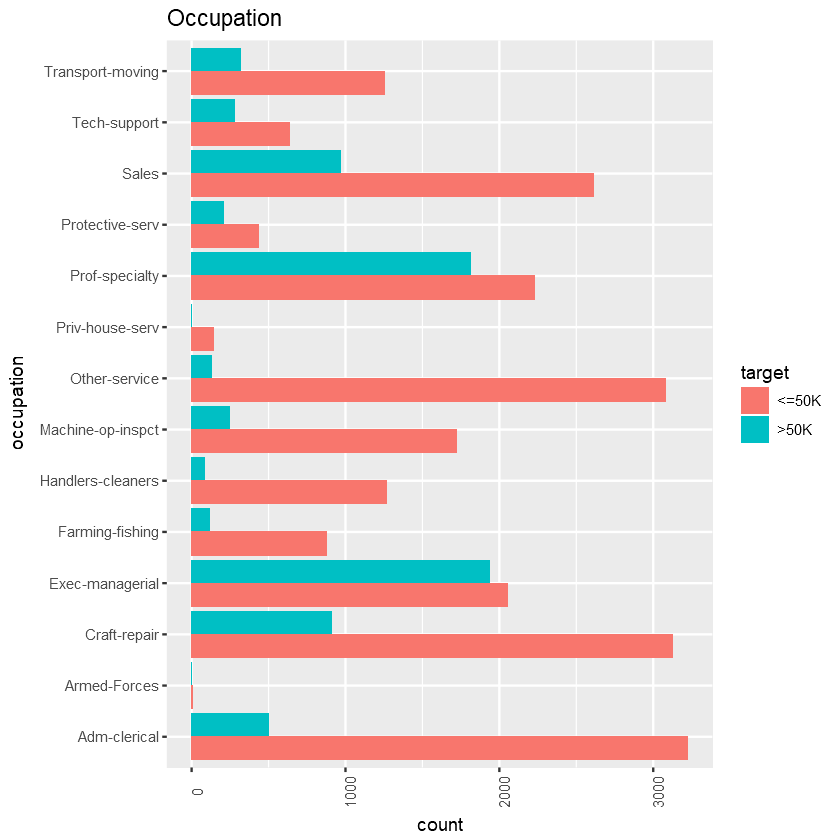

In [17]:
#occupation
ggplot(adult_omitted, aes(x = occupation, fill = target)) + geom_bar(position="dodge") + coord_flip()+
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Occupation")

**We plot here the income of each Race(عرق), We notice that all the races all are relatively equal and has the same distribution**

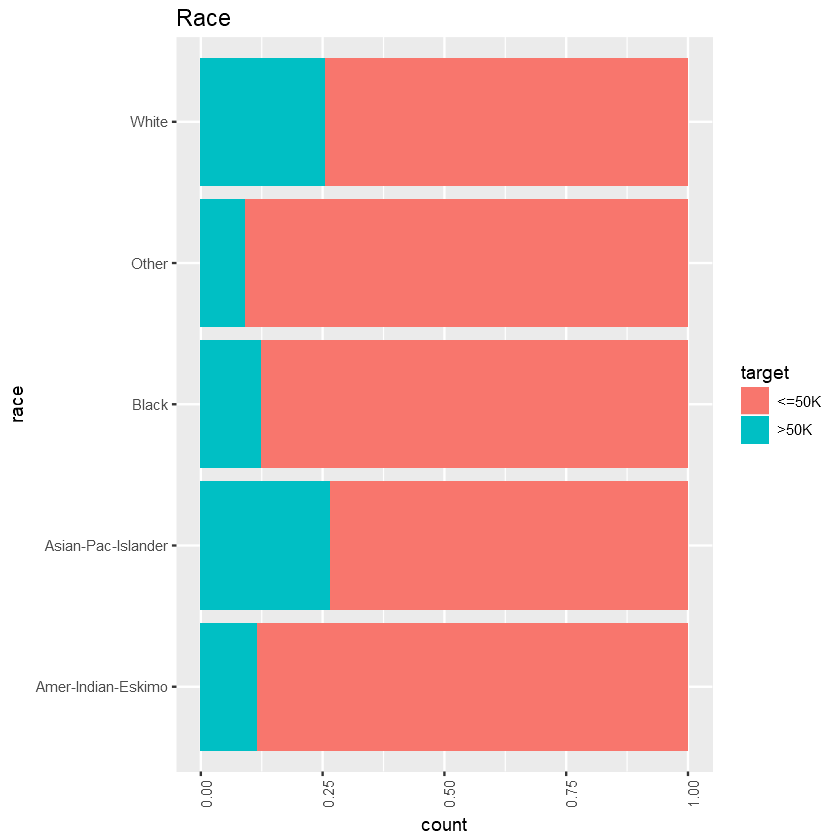

In [28]:
#race
ggplot(adult, aes(x = race, fill = target)) + geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Race")

**The Male earns more than female, this a stats plot**

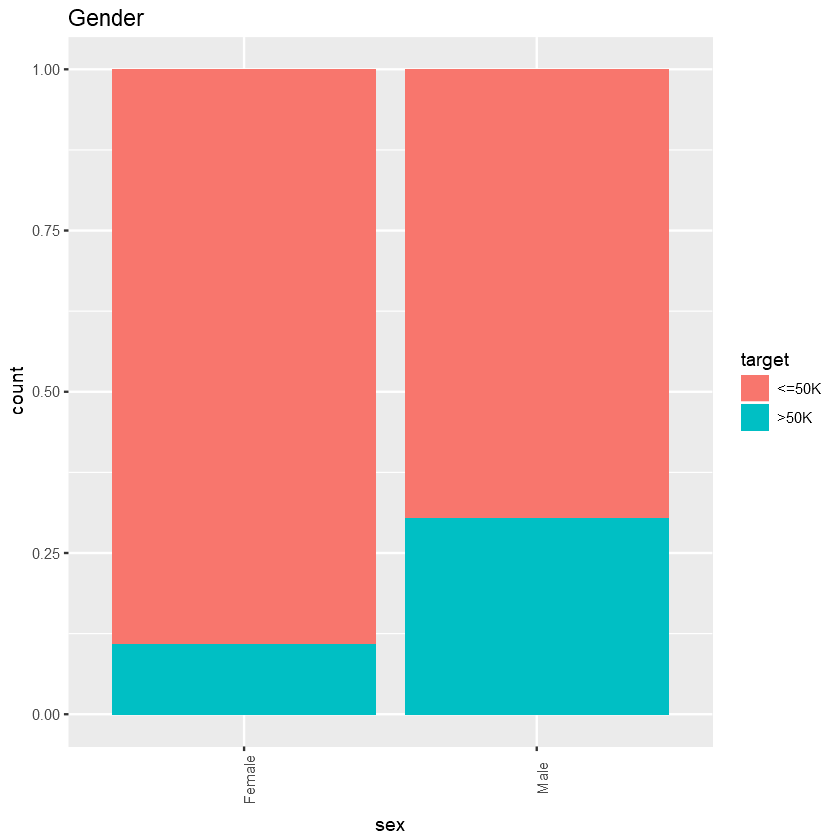

In [59]:
#sex
ggplot(adult, aes(x = sex, fill = target)) + 
geom_bar(position="fill") + theme(axis.text.x = element_text(angle = 90)) + ggtitle("Gender")

**The most of people in Taiwan and France earn more than 50K, in the other side some countries like Netherland and Guam has no people earn more than 50K$  **

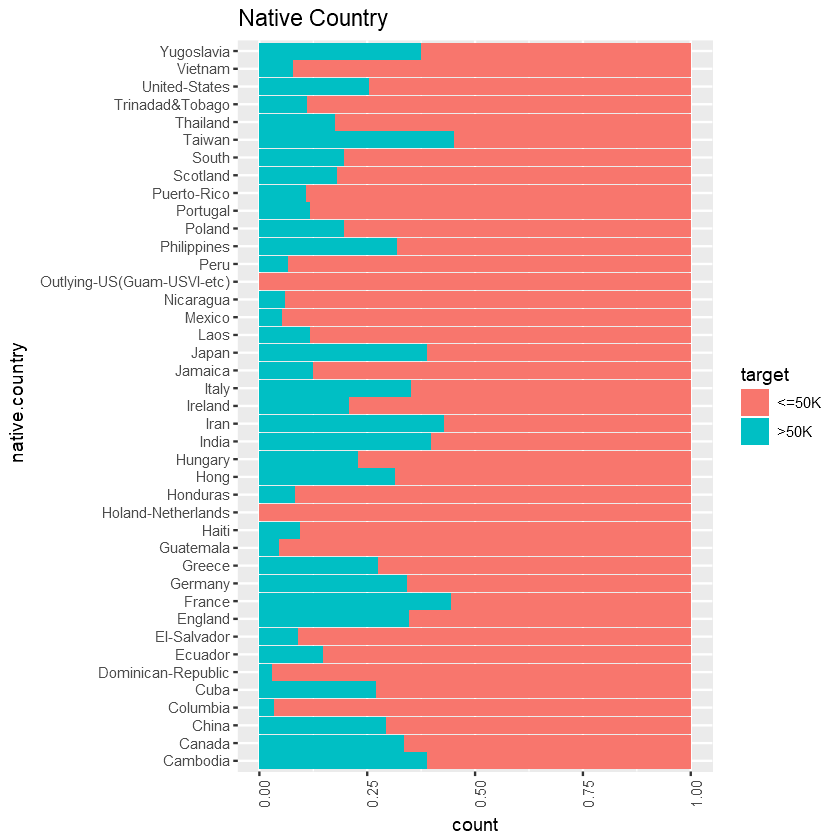

In [29]:
#native.country
ggplot(adult_omitted, aes(x = native.country, fill = target)) + 
geom_bar(position="fill") + coord_flip() +
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Native Country")

**The Husband and Wife earn more than 50K**

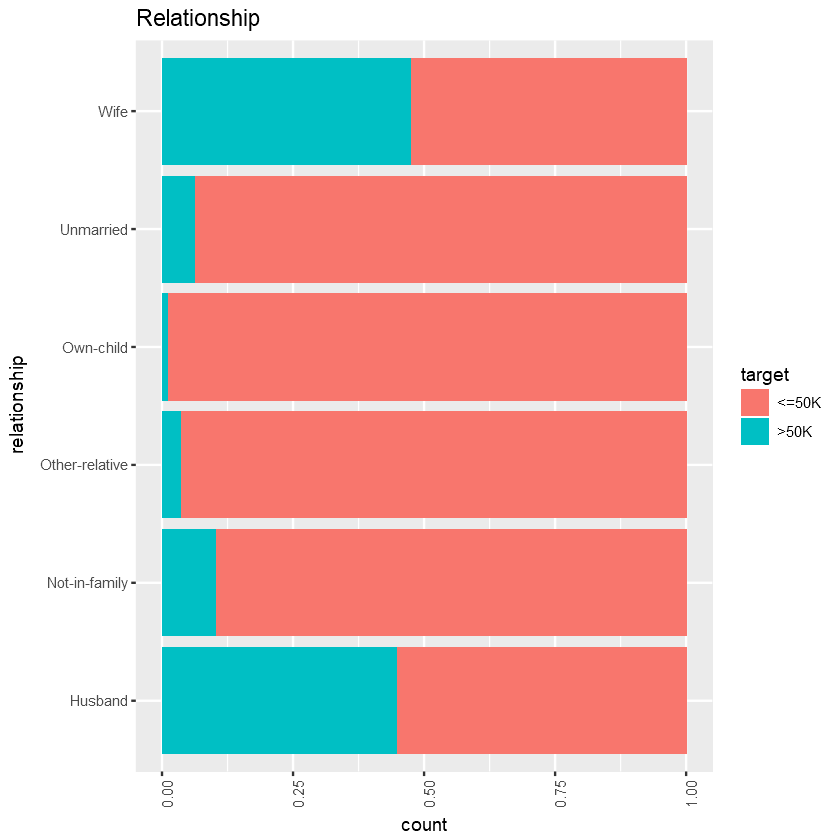

In [30]:
#relationship
ggplot(adult, aes(x = relationship, fill = target)) + geom_bar(position="fill") + coord_flip()+
theme(axis.text.x = element_text(angle = 90)) + ggtitle("Relationship")

## *Correlation between variables*

**People who earn High school grade degree or bachelor degree are most Married as Civilian marraige..distribution of Divorced is little but is more in (Asoc-Acdm)..Married Sposue absent is little in some education levels and disappeared in others ** 

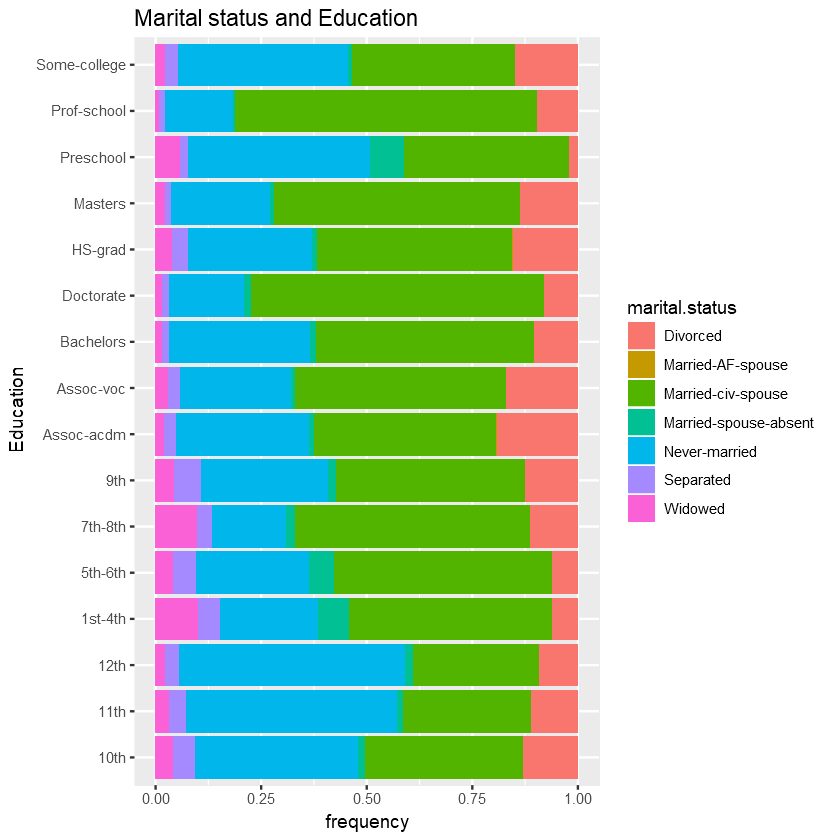

In [19]:
ggplot(adult, aes(education, fill = marital.status )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and Education')+
  xlab('Education') +
  ylab('frequency')


Counries and Education

**we notice that in some countries (Yugoslavia,Trinadad&Tobago,Taiwan,Holand)no widowed we conclude that num of death people (الوفيات) is low in this countries**

**We see that most countries has high distribution in Civilian marriage(زواج حضوري)**

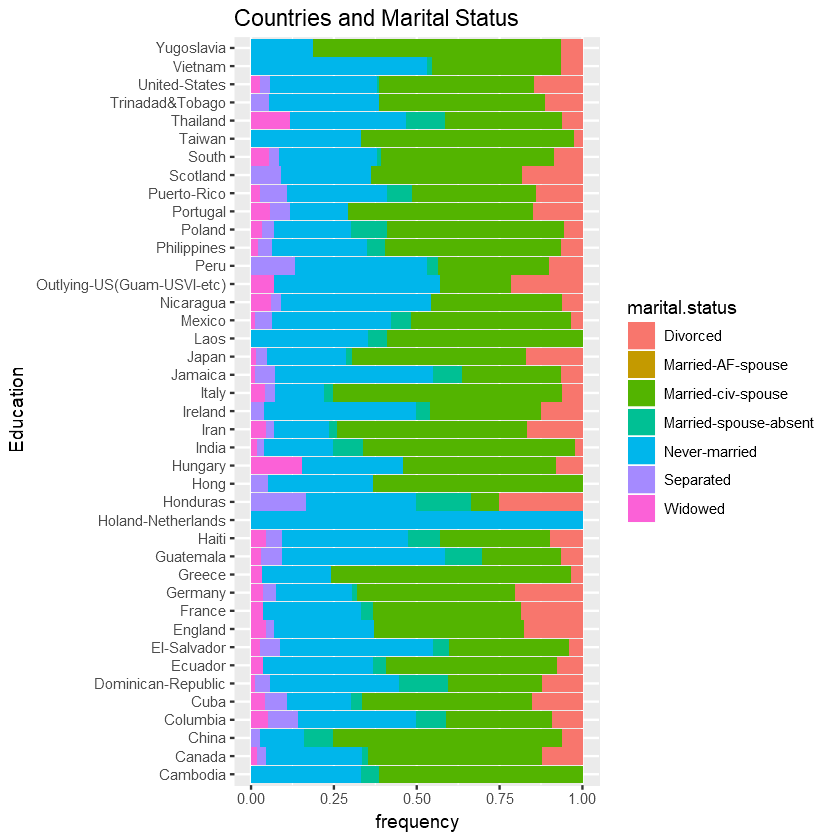

In [17]:
ggplot(adult_omitted, aes(native.country, fill = marital.status )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Countries and Marital Status')+
  xlab('Education') +
  ylab('frequency')


**This plot suppose to get more info. about some countries to explore the race of some countries,It can be trivial to know that Scotland has Whites,but for example: *Japan* has blacks** 

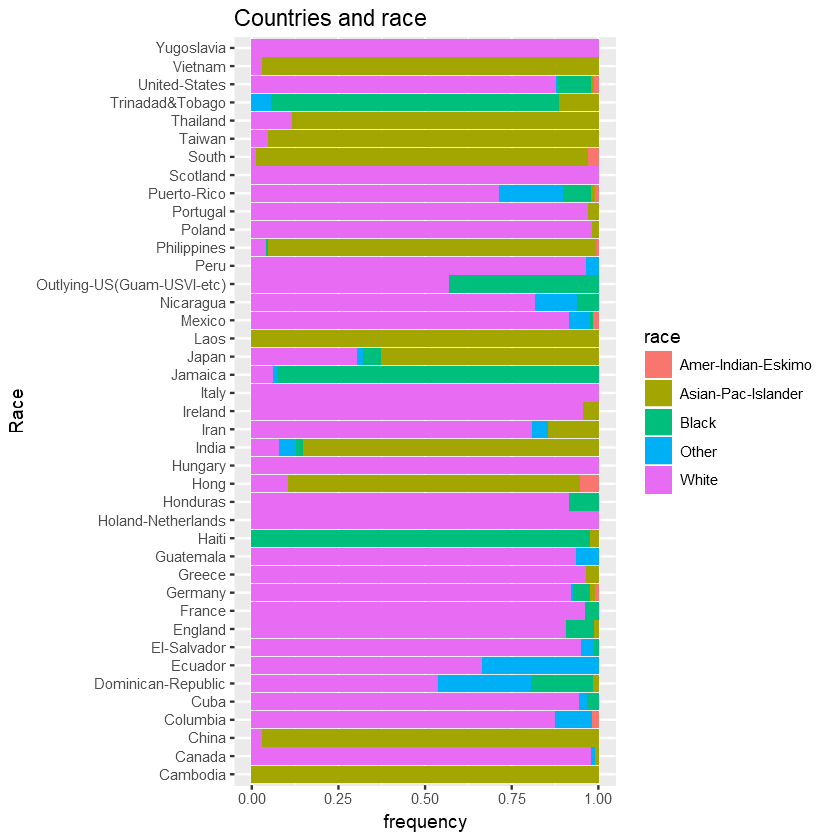

In [42]:
ggplot(adult_omitted, aes(native.country, fill = race )) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Countries and race')+
  xlab('Race') +
  ylab('frequency')


**We see that the white has most distribution in our dataset,No asian race in Armed Force marraige**

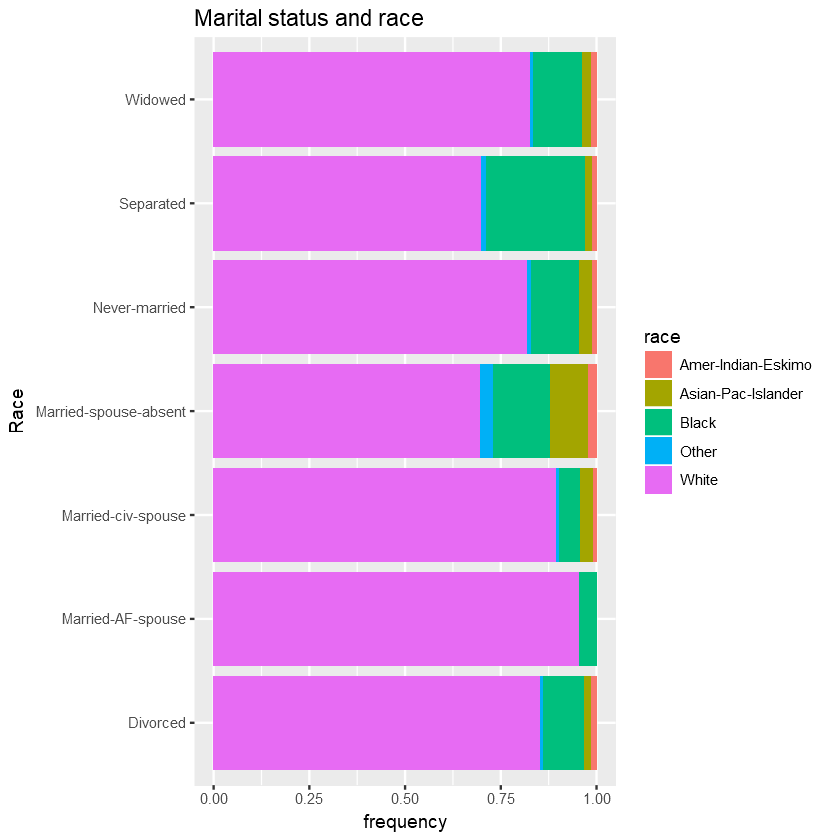

In [53]:
ggplot(adult, aes(marital.status, fill = race) ) +
  geom_bar(position = "fill")+ coord_flip() +
  ggtitle('Marital status and race')+
  xlab('Race') +
  ylab('frequency')


**The following two plots indicate the same knowledge, As the degree you earn or  years of education increse , your income increse**

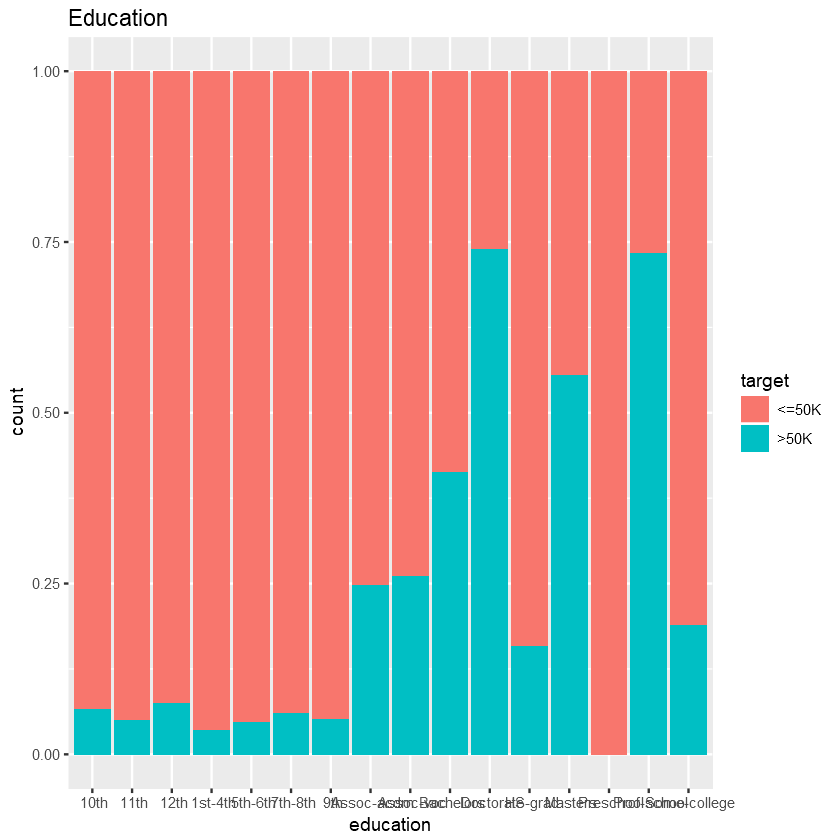

In [23]:
#education vs education.num
#Plotting education and education.num
ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") + ggtitle("Education")

In [29]:
#ggplot(adult, aes(x = education, fill = target)) + geom_bar(position="fill") + 
#ggtitle("Years of Education")

**Mean number of working hours per week for each gender**

From the plot below, the male is the has more working hours in each occupation,but is get closer in some occupations like *Craft Repair*


**In this plot we study the num of hours worked by each gender,,we notice that male worked more than female in all ocupation
male work more in (Farming-Fishing)...female work more in (Exec-Mangerial)**

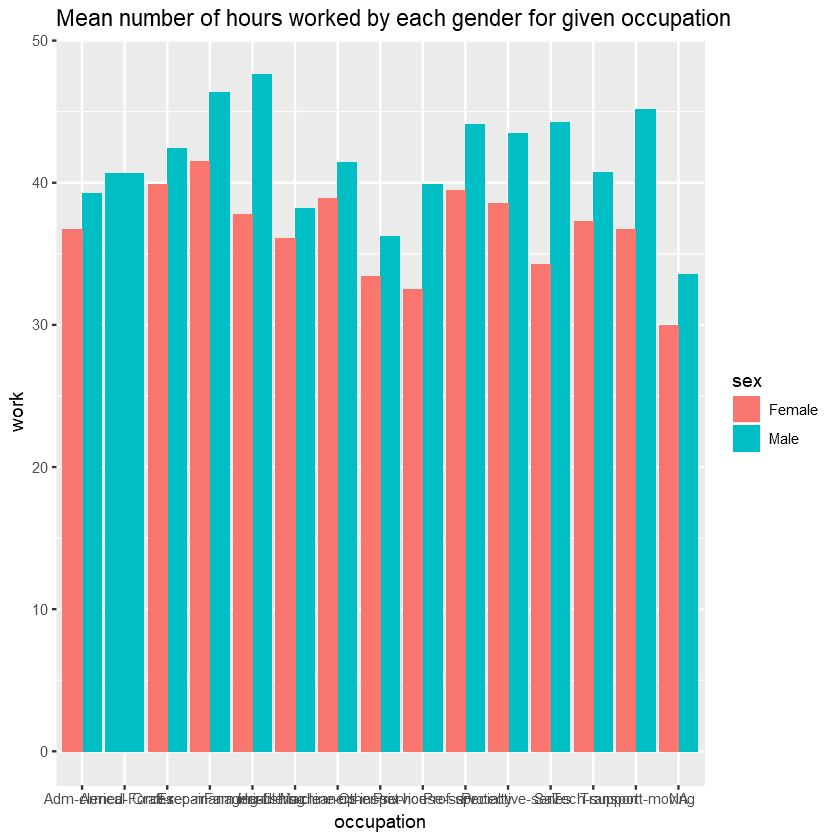

In [37]:
adult %>% select(sex,occupation,hours.per.week) %>% group_by(sex,occupation) %>% 
  summarise(work=mean(hours.per.week)) %>%
  ggplot(aes(x=occupation, y=work, fill=sex)) +
  geom_bar(position="dodge",stat='identity')+
  ggtitle("Mean number of hours worked by each gender for given occupation")

***Number of workers of each gender in each occupation***

**In this plot we focus on number of each gender in all ocupations..and we see that num of male is greater than female in all fields..but in one field (Adm clerical)female is greater than male** 

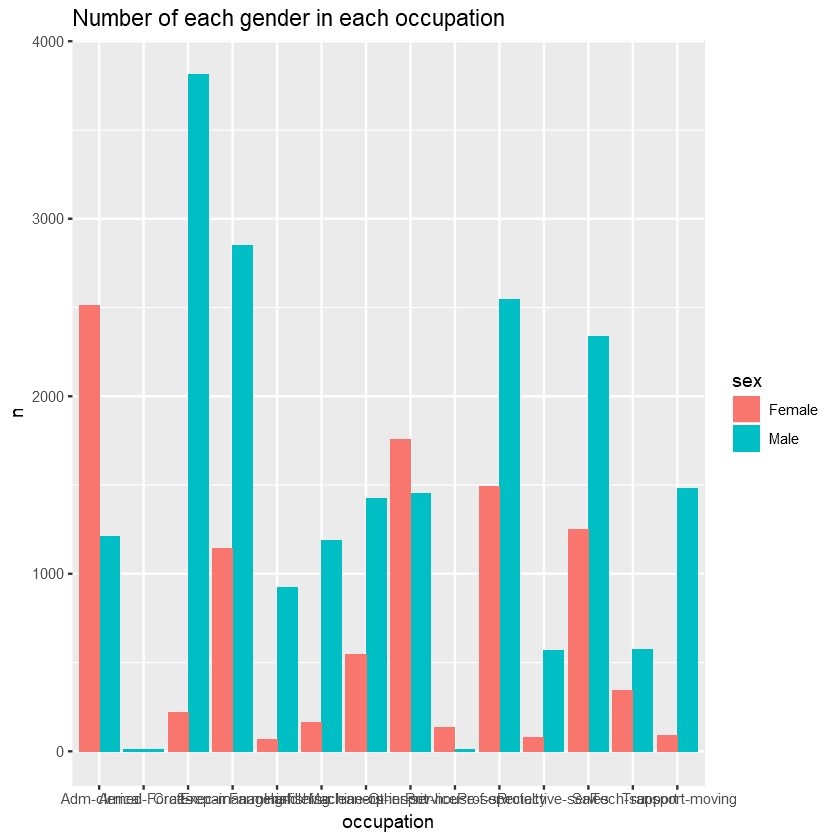

In [34]:
adult_omitted %>% select(sex,occupation) %>% group_by(occupation,sex) %>% summarise(n=n())%>%
  ggplot(aes(x=occupation,y=n,fill=sex))+
  geom_bar(position='dodge',stat='identity')+ #If you want the heights of the bars to represent values in the data, use stat="identity"
  ggtitle("Number of each gender in each occupation")

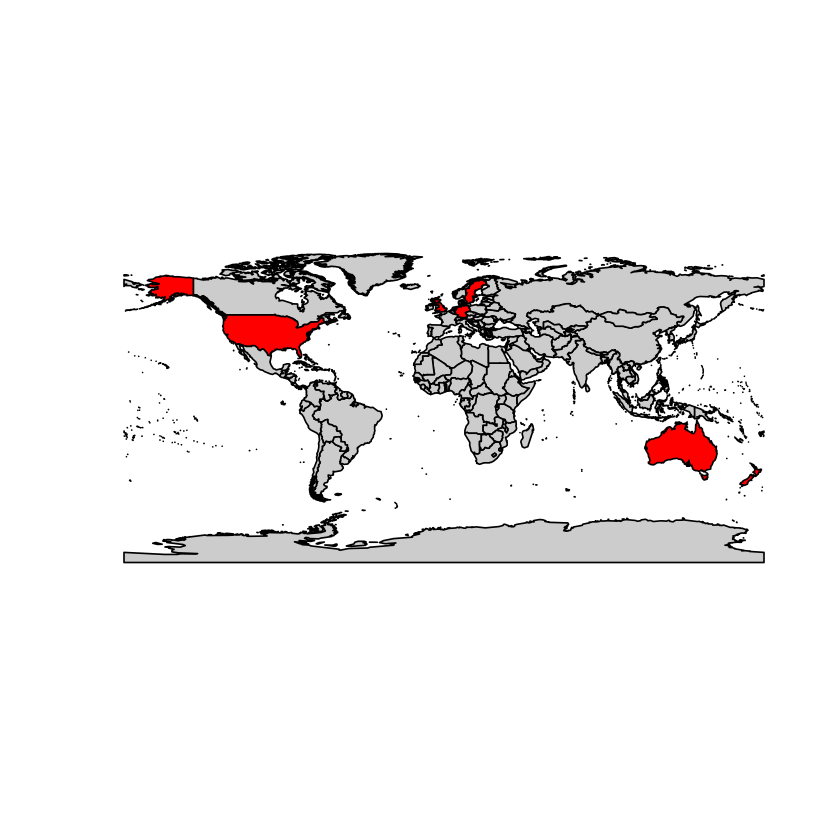

In [23]:
library(maptools)
data(wrld_simpl)
myCountries = wrld_simpl@data$NAME %in% c("Australia", "United Kingdom", "Germany", "United States", "Sweden", "Netherlands", "New Zealand")
plot(wrld_simpl, col = c(gray(.80), "red")[myCountries+1])

## Classification

In [23]:
library(caret)
library(caTools)
#Split Data into train and test
spl<-sample.split(adult_omitted$target, SplitRatio=0.8)
train<-subset(adult_omitted,spl== TRUE)
test <-subset(adult_omitted, spl== FALSE)

### Logistic Regression *(Generalized Linear Models)*

![title](LogisticReg.png)

In [36]:
lg <- glm(target ~.,family = binomial(link='logit'),data=train)
Prediction2 <- predict(lg,newdata=test[-15],type = 'response')
Pred <- ifelse(Prediction2>0.5,1,0)
table(actual= test$target, predicted= Pred>0.5)

        predicted
actual   FALSE TRUE
   <=50K  4190  341
   >50K    639  863

In [38]:
lgAcu <- (4190+823)/6033
lgAcu


[1] 0.8309299

Warning message:
"package 'ROCR' was built under R version 3.4.4"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.4"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



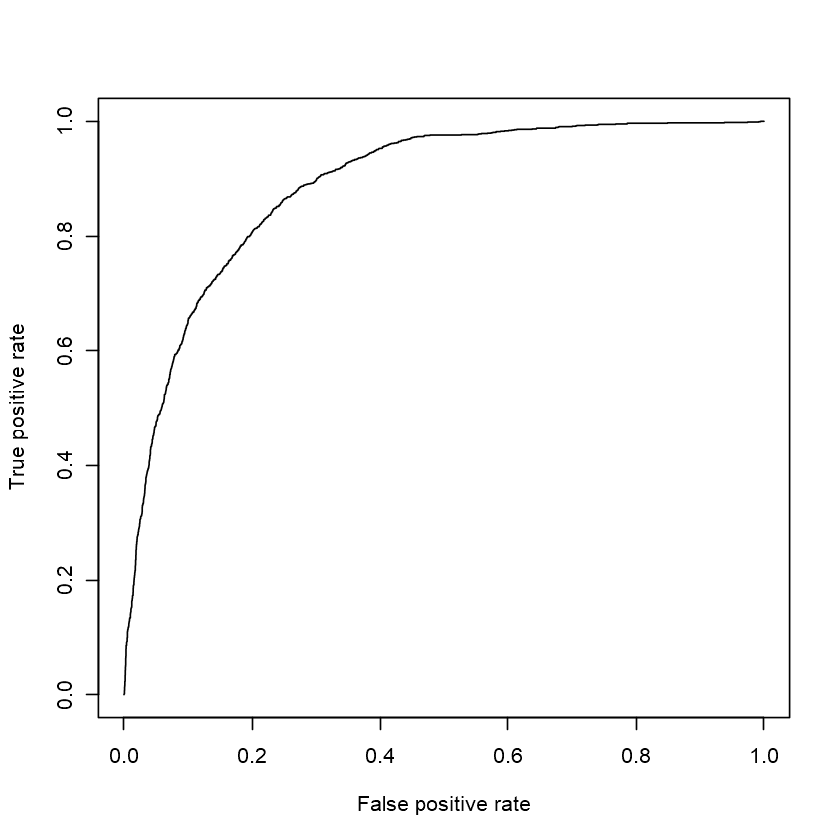

In [39]:
library(ROCR)
ROCRpred<- prediction(Prediction2, test$target)
perf<- performance(ROCRpred, "tpr", "fpr")
plot(perf)

### Decision Tree

In [24]:
library(rpart)
library(rpart.plot)

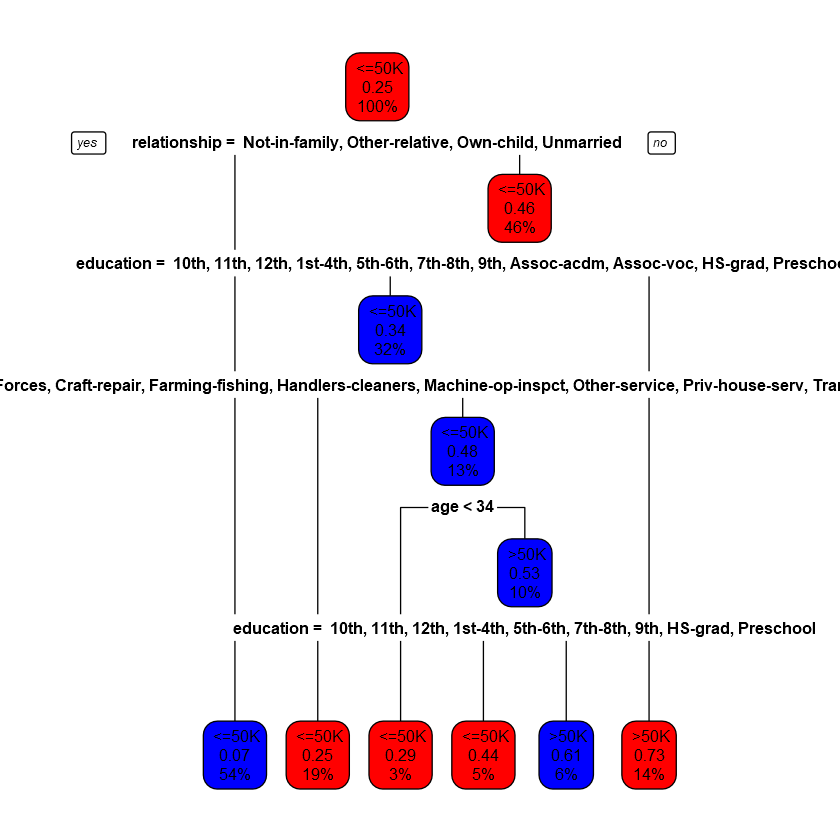

In [25]:
census_tree<-rpart(target ~ ., data=train, method="class")
#prp(census_tree)
rpart.plot(census_tree, box.col=c("red", "blue"))

In [26]:
predict_tree = predict(census_tree, newdata = test, type = "class")
confusionmatrix_tree<-table(test$target, predict_tree)
confusionmatrix_tree


        predict_tree
          <=50K  >50K
   <=50K   4200   331
   >50K     698   804

In [27]:
accuract_CART <- (confusionmatrix_tree[1,1] + confusionmatrix_tree[2,2])/sum(confusionmatrix_tree)
accuract_CART


[1] 0.8294381

### Support Vector Machine (SVM)

![title](Kernel_Machine.png)

In [35]:
svm.model<- svm(target~., data = train,kernel = "radial", cost = 1, gamma = 0.1)
svm.predict <- predict(svm.model, test)
confusionMatrix(test$target, svm.predict)


Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   4229   302
     >50K     669   833
                                          
               Accuracy : 0.8391          
                 95% CI : (0.8295, 0.8482)
    No Information Rate : 0.8119          
    P-Value [Acc > NIR] : 2.018e-08       
                                          
                  Kappa : 0.5313          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8634          
            Specificity : 0.7339          
         Pos Pred Value : 0.9333          
         Neg Pred Value : 0.5546          
             Prevalence : 0.8119          
         Detection Rate : 0.7010          
   Detection Prevalence : 0.7510          
      Balanced Accuracy : 0.7987          
                                          
       'Positive' Class :  <=50K          
                                          

In [37]:
SVMAcu <-confusionMatrix(svm.predict,test$target)$overall[1]
SVMAcu

Accuracy 
0.8390519

### Random Forest

![title](RF_tree.jpg)

In [52]:

rfFit<- randomForest(target~.,data= train)
print(rfFit)
rnf_pred <- predict(rfFit,newdata = test[,-15],type = 'class', num.trees = 500,importance = "impurity")
rfAcu <-confusionMatrix(rnf_pred,test$target)$overall[1]
rfAcu


Call:
 randomForest(formula = target ~ ., data = train) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 24.56%
Confusion matrix:
        <=50K  >50K class.error
 <=50K  18092    31 0.001710534
 >50K    5896   110 0.981684982


Accuracy 
0.7553456

In [54]:
#var.imp <- ranger::importance(rfFit)
#var.imp <- dplyr::data_frame(variable = names(var.imp), importance = var.imp) %>% 
 #  dplyr::arrange(desc(importance))
#var.imp